In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
with open('../results/gains_v1.pickle', 'rb') as f:
    data = pickle.load(f)

In [3]:
gains = data['gain']
rewards = data['reward']
costs = data['cost']
reward_change_points = data['reward_change_points']
cost_change_points = data['cost_change_points']
all_change_points = data['all_change_points']

In [4]:
rewards['Oracle'][-1]

9245.0

In [5]:
rewards['Sim-OOS'] = rewards['SimOOS']
del rewards['SimOOS']

gains['Sim-OOS'] = gains['SimOOS']
del gains['SimOOS']

costs['Sim-OOS'] = costs['SimOOS']
del costs['SimOOS']

In [6]:
rewards['NCC-UCRL2'] = rewards['Algorithm1']
del rewards['Algorithm1']

gains['NCC-UCRL2'] = gains['Algorithm1']
del gains['Algorithm1']

costs['NCC-UCRL2'] = costs['Algorithm1']
del costs['Algorithm1']

In [7]:
gains['Oracle'][-1] + costs['Oracle'][-1]

9245.000000000015

In [8]:
labels = sorted(rewards.keys(), key=lambda x: gains[x][-1], reverse=True)

final_gains = [gains[label][-1] for label in labels]
final_rewards = [rewards[label][-1] for label in labels]
final_costs = [costs[label][-1] for label in labels]

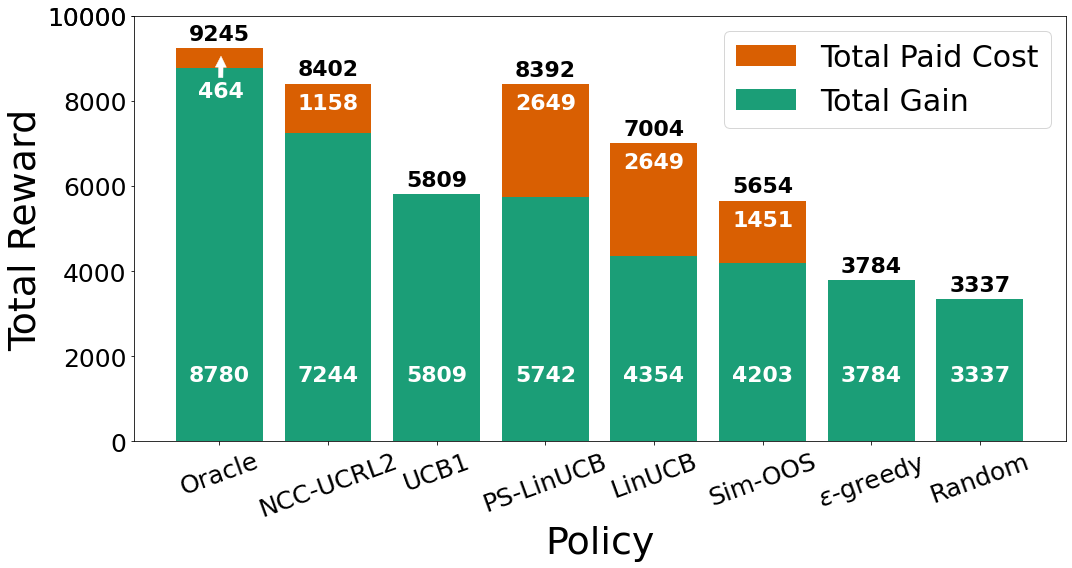

In [18]:
fig, ax = plt.subplots(1,1, figsize=(15,8 ));


colors = plt.cm.Dark2(np.linspace(0,1,8))
ax.set_prop_cycle('color', colors[:2][::-1])

# Make stacked bar charts
rects_cost = ax.bar(labels, final_costs, bottom=final_gains,
                     label='Total Paid Cost',
                   )

rects_gain = ax.bar(labels, final_gains,
                     label='Total Gain'
                   )


# Write values for gains and rewards
for i, rect in enumerate(rects_gain):

    gain_height = 2000#rect.get_height() 
    
    
#     if labels[i] == 'Oracle':
#         gain_height = rects_gain[i+1].get_height() 
    
    ax.text(rect.get_x() + rect.get_width()/2.0, gain_height-670,
            '%.1d' % final_gains[i],
            ha='center', va='bottom',
            fontsize=22,
            color='w',
            fontweight='bold',
    )
    
    reward_height = rect.get_height() + rects_cost[i].get_height()
    ax.text(rect.get_x() + rect.get_width()/2.0, reward_height+100,
            '%.1d' % final_rewards[i],
            ha='center', va='bottom',
            fontsize=22,
            fontweight='bold',
    )
    
# Write values for costs
for i, rect in enumerate(rects_cost):
    
    if final_costs[i] == 0:
        continue
        
    if labels[i] == 'Oracle':
        continue
        
    height = rect.get_height() + rects_gain[i].get_height()
    
    ax.text(rect.get_x() + rect.get_width()/2.0, height - 685,
            '%.1d' % final_costs[i],
            ha='center', va='bottom',
            fontsize=22,
            color='w',
            fontweight='bold',
    )
    
# Write value for oracle cost that did not fit inside rectangle
oracle_index = labels.index('Oracle')
oracle_gain_height = rects_gain[oracle_index].get_height() - 700
oracle_gain_loc = rects_gain[oracle_index].get_x() + rects_gain[oracle_index].get_width()/2.0 - 0.2
oracle_cost = final_costs[oracle_index]

xytext=(oracle_gain_loc, oracle_gain_height)
xy = (xytext[0]+0.215, xytext[1]+1020)

ax.annotate(
    text=f"{int(oracle_cost)}",
    xy=xy,
    xytext=xytext,
    arrowprops=dict(arrowstyle="simple", color='w', linewidth=0.5),
    fontsize=22, fontweight='bold',
    color='w',
)

plt.xticks(rotation=20, fontsize=25)
extraticks = [10000]
plt.yticks(list(ax.get_yticks()) + extraticks, fontsize=25)


ax.set_xlabel('Policy', fontsize=38)
ax.set_ylabel('Total Reward', fontsize=38)

plt.legend(prop={'size': 30});

plt.tight_layout()

plt.savefig('nursery_reward_barchart.pdf', bbox_inches='tight')
plt.show()

In [10]:
labels

['Oracle',
 'NCC-UCRL2',
 'UCB1',
 'PS-LinUCB',
 'LinUCB',
 'Sim-OOS',
 '$\\epsilon$-greedy',
 'Random']